Name : Budhaditya Mukhopadhyay (229960)

# **TASK 2 : Regularization**

In this task, you will investigate how different regularization techniques affect the training behavior.

Pick a architecture of your choice to train on Cifar10.
Using the same training set, optimizer (and its hyperparameters),
train this architecture first without any regularization, then add different regularizers.
Compare the training and valid/test curves, e.g. regarding:

training and test accuracy (or loss)
generalization error, i.e. the gap between train and test (including how strong the overfitting gets)
difference between when training has converged and at the sweet spot of generalization (smallest gap)
Regularization can be applied to the model (e.g. dropout, L1, L2, added noise) or to the inputs themselves (e.g. rotations, added noise, blurring).

Now choose a different architecture and/or data set and repeat the experiments.
Are the results (qualitatively) still the same? If they are different, discuss potential reasons.

Bonus: Do not only compare visually, but use meaningful quantitative measures for comparison.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

## Dataset 1 : CIFAR 10

170500096/170498071 [==============================] - 2s 0us/step
truck


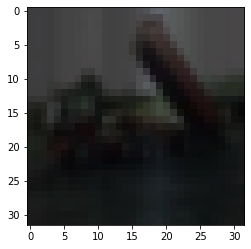

In [ ]:
cifar = tf.keras.datasets.cifar10
#Load Data
(cx_train, cy_train), (cx_test, cy_test) = cifar.load_data()

#Normalize
cx_train = tf.keras.utils.normalize(cx_train, axis=1)
cx_test = tf.keras.utils.normalize(cx_test, axis=1)

#Initialize Class Labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print(class_names[cy_train[2,0]])
plt.imshow(cx_train[2])

In [ ]:
#Model with Regularizer
factor = 0.0001
model_reg = models.Sequential()
model_reg.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(factor), padding='same', input_shape=(32, 32, 3)))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(factor), padding='same'))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.MaxPooling2D((2, 2)))
model_reg.add(layers.Dropout(0.2))

model_reg.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(factor), padding='same'))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(factor), padding='same'))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.MaxPooling2D((2, 2)))
model_reg.add(layers.Dropout(0.2))

model_reg.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(factor), padding='same'))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(factor), padding='same'))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.MaxPooling2D((2, 2)))
model_reg.add(layers.Dropout(0.2))

model_reg.add(layers.Flatten())
model_reg.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(factor)))
model_reg.add(layers.Dropout(0.2))
model_reg.add(layers.Dense(10, activation='softmax'))
model_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
#Model without Regularizer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))

model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(cx_train,cy_train,epochs=10)
print("----------------------------------------------------------------------------------------------------")
model_reg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_reg.fit(cx_train,cy_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 423s 271ms/step - loss: 1.2223 - accuracy: 0.5666
Epoch 2/10
1563/1563 [==============================] - 427s 273ms/step - loss: 0.7890 - accuracy: 0.7236
Epoch 3/10
1563/1563 [==============================] - 427s 273ms/step - loss: 0.6249 - accuracy: 0.7823
Epoch 4/10
1563/1563 [==============================] - 422s 270ms/step - loss: 0.5037 - accuracy: 0.8250
Epoch 5/10
1563/1563 [==============================] - 426s 272ms/step - loss: 0.4047 - accuracy: 0.8584
Epoch 6/10
1563/1563 [==============================] - 426s 272ms/step - loss: 0.3173 - accuracy: 0.8892
Epoch 7/10
1563/1563 [==============================] - 424s 271ms/step - loss: 0.2472 - accuracy: 0.9147
Epoch 8/10
1563/1563 [==============================] - 426s 272ms/step - loss: 0.1942 - accuracy: 0.9330
Epoch 9/10
1563/1563 [==============================] - 426s 272ms/step - loss: 0.1662 - accuracy: 0.9421
Epoch 10/10
1563/1563 [=======================

In [ ]:
val_loss, val_accuracy = model.evaluate(cx_test,cy_test)
print(val_loss, val_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.9121 - accuracy: 0.7894
0.9121251702308655 0.9121251702308655


In [ ]:
val_loss, val_accuracy = model_reg.evaluate(cx_test,cy_test)
print(val_loss, val_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.9399 - accuracy: 0.7863
0.939872682094574 0.939872682094574


## Dataset 2 : CIFAR 100

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

In [2]:
cifar100 = tf.keras.datasets.cifar100
#Load Data
(cx_train, cy_train), (cx_test, cy_test) = cifar100.load_data()

#Normalize
cx_train = tf.keras.utils.normalize(cx_train, axis=1)
cx_test = tf.keras.utils.normalize(cx_test, axis=1)

169009152/169001437 [==============================] - 6s 0us/step


In [3]:
#Model with Regularizer
factor = 0.0001
model_reg = models.Sequential()
model_reg.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(factor), padding='same', input_shape=(32, 32, 3)))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(factor), padding='same'))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.MaxPooling2D((2, 2)))
model_reg.add(layers.Dropout(0.2))

model_reg.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(factor), padding='same'))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(factor), padding='same'))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.MaxPooling2D((2, 2)))
model_reg.add(layers.Dropout(0.2))

model_reg.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(factor), padding='same'))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(factor), padding='same'))
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.MaxPooling2D((2, 2)))
model_reg.add(layers.Dropout(0.2))

model_reg.add(layers.Flatten())
model_reg.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(factor)))
model_reg.add(layers.Dropout(0.2))
model_reg.add(layers.Dense(100, activation='softmax'))
model_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [4]:
#Model without Regularizer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))

model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 64)       

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(cx_train,cy_train,epochs=10)
print("----------------------------------------------------------------------------------------------------")
model_reg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_reg.fit(cx_train,cy_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.8163 - accuracy: 0.1201
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.8248 - accuracy: 0.2805
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3640 - accuracy: 0.3713
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0664 - accuracy: 0.4378
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8197 - accuracy: 0.4914
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5992 - accuracy: 0.5459
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3897 - accuracy: 0.5965
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1942 - accuracy: 0.6452
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0177 - accuracy: 0.6938
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.864

In [6]:
val_loss, val_accuracy = model.evaluate(cx_test,cy_test)
print(val_loss, val_loss)

313/313 [==============================] - 1s 3ms/step - loss: 2.8847 - accuracy: 0.4108
2.8846683502197266 2.8846683502197266


In [7]:
val_loss, val_accuracy = model_reg.evaluate(cx_test,cy_test)
print(val_loss, val_loss)

313/313 [==============================] - 1s 3ms/step - loss: 2.4542 - accuracy: 0.4409
2.454164743423462 2.454164743423462


## Observation

Regularization used -
*   Dropout
*   L2 (factor = 0.0001)


Dataset 1 : CIFAR10
<br>
We can clearly observe that after performing regularization on the model, it is not performing as expected. It is giving 78.94% accuracy without using the regularizer and with the regularizer we are getting an accuracy of 78.63%. There is only a very small difference.
<br>
Dataset 2 : CIFAR100
<br>
In CIFAR100 dataset using the same model and same epoch size we can observe that regularizer is giving us a benifit. Without regularizer we are getting an accuracy of 41.08% and after using the regularizer we are getting 44.09%. 
Clearly we can understand that the low accuracy is due to the less number of epochs. Here the regularizer helps in increasing the accuracy as the dataset is 10 times more than the CIFAR10.
<br>


Regularizers can be effective if we make our model even more deeper. 
<br>

<br>
